In [4]:
# Local paths
dir_pfx = './'
data_dir = dir_pfx + '../../data/Vehicules1024/'
# Add the local_modules directory to the set of paths
# Python uses to look for imports.
import sys
sys.path.append(dir_pfx)
sys.path.append('../')
sys.path.append('../../')

In [7]:
!pip install --user imageio

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
#!pip install -q git+https://www.github.com/keras-team/keras-contrib.git
#!pip install --user scikit-image
#!pip install --user imageio
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from importlib import reload
import utils
import DenseSRGAN


/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
num_images = 50
files = utils.scan_dataset(data_dir, num_images) #TODO: 50
training_set, testing_set = utils.create_subsets(files, data_dir, use_validation=False)
im_hr, im_lr, batch_idx = utils.load_data(0, training_set, data_dir, True, len(training_set))


The following image is missing!: 00000005
The following image is missing!: 00000023
Using 48 images.
Saving files to ./../../data/Vehicules1024/


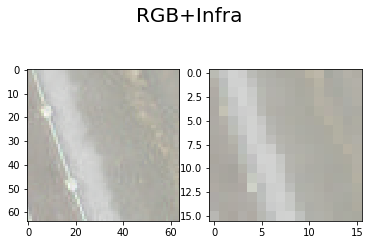

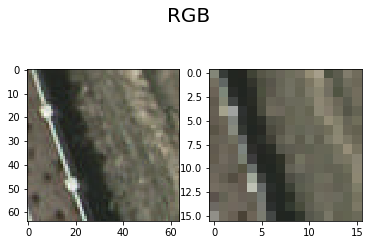

In [6]:
ix = 2560
normalized_around_zero = False

if normalized_around_zero:
    plt.figure().suptitle('RGB+Infra', fontsize=20)
    plt.subplot(1,2,1)
    plt.imshow(utils.un_normalize(im_hr[ix,:,:,:]))
    plt.subplot(1,2,2)
    plt.imshow(utils.un_normalize(im_lr[ix,:,:,:]))

    plt.figure().suptitle('RGB', fontsize=20)
    plt.subplot(1,2,1)
    plt.imshow(utils.un_normalize(im_hr[ix,:,:,0:3]))
    plt.subplot(1,2,2)
    plt.imshow(utils.un_normalize(im_lr[ix,:,:,0:3]))
else:
    plt.figure().suptitle('RGB+Infra', fontsize=20)
    plt.subplot(1,2,1)
    plt.imshow(im_hr[ix,:,:,:])
    plt.subplot(1,2,2)
    plt.imshow(im_lr[ix,:,:,:])

    plt.figure().suptitle('RGB', fontsize=20)
    plt.subplot(1,2,1)
    plt.imshow(im_hr[ix,:,:,0:3])
    plt.subplot(1,2,2)
    plt.imshow(im_lr[ix,:,:,0:3])

## Load GAN Model for Training

In [5]:
gan = DenseSRGAN.DenseSRGAN(dir_pfx,                          # Working directory
                            im_hr,im_lr,                      # High Res / Low Res Images
                            proj_pfx="OH",gpu_list=[1,3,5,7], # Prefix for saving
                            dropout_rate=0.3,                 # Droupout Rate
                            num_epochs_trained=0)             # Number of epochs if 
                                                              # continuing training


## Train the model 

In [ ]:
gan.train(epochs=1000,       # Number of epochs
          verbose=False,     # Print time for each step
          bench_idx=2560,    # Index of image for benchmark
          batch_size=16,     # Minibatch size
          save_interval=10,  # Interval epochs to save weights/benchmark
          view_interval=2)   # Interval epochs to print loss

## Load a Pretrained Model with weights

In [ ]:
gan = DenseSRGAN.DenseSRGAN(dir_pfx,                          # Working directory
                            im_hr,im_lr,                      # High Res / Low Res Images
                            proj_pfx="OH",gpu_list=None, # Prefix for saving
                            dropout_rate=0.3,                 # Droupout Rate
                            weigths_path
                            num_epochs_trained=0)             # Number of epochs if 
                                                              # continuing training

## Show some predictions vs actual patches

In [ ]:
ix = 10
ix2 = 11

img = gan.gen.predict(im_lr[ix:ix+1,:,:,:]).squeeze()
img = (img + 1)/2
plt.figure().suptitle('RGB+Infra', fontsize=20)
plt.subplot(1,2,1)
plt.imshow(im_hr[ix,:,:,:])
plt.subplot(1,2,2)
plt.imshow(img)

img = gan.gen.predict(im_lr[ix2:ix2+1,:,:,:]).squeeze()
img = (img + 1)/2
plt.figure().suptitle('RGB+Infra', fontsize=20)
plt.subplot(1,2,1)
plt.imshow(im_hr[ix2,:,:,:])
plt.subplot(1,2,2)
plt.imshow(img)

## Show the loss of the discriminator on some real/generated images

In [ ]:
floss = []
tloss = []

for i in np.random.randint(low=0,high=len(im_lr),size=(500)):
  tloss.append(gan.disc.predict(im_hr[i:i+1,:,:,:]).squeeze())
  floss.append(gan.disc.predict(gan.gen.predict(im_lr[i:i+1,:,:,:])).squeeze())

  
print('Mean Loss Real Images: {0}'.format(np.mean(tloss)))
print('Mean Loss False Images: {0}'.format(np.mean(floss)))


plt.figure()
plt.plot(list(range(len(tloss))),tloss)
plt.plot(list(range(len(floss))),floss)
plt.legend(['Loss Real Images','Loss Generated Images'])
plt.xlabel('Random Sample Number')
plt.ylabel('Cross Entropy Loss')
plt.show